In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles 
from sklearn.metrics import accuracy_score 

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 


<Axes: >

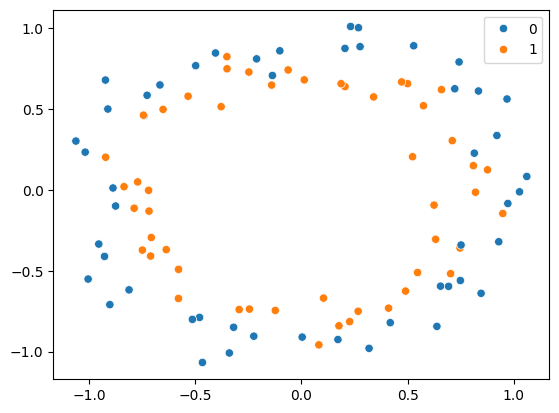

In [4]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [11]:
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.3)

In [12]:
model =Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

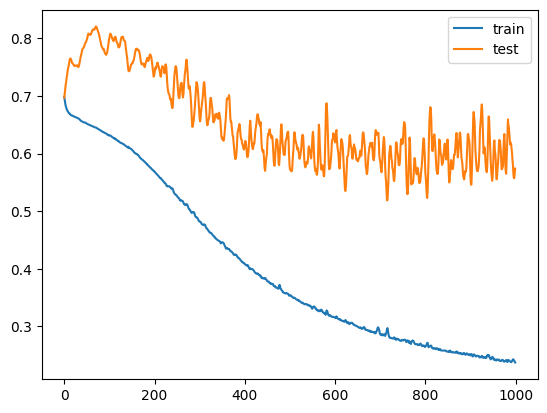

In [17]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [18]:
# for 500 data points we will get  good resul 

In [19]:
# we use eEarlyStopping for stoping the algorthim 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

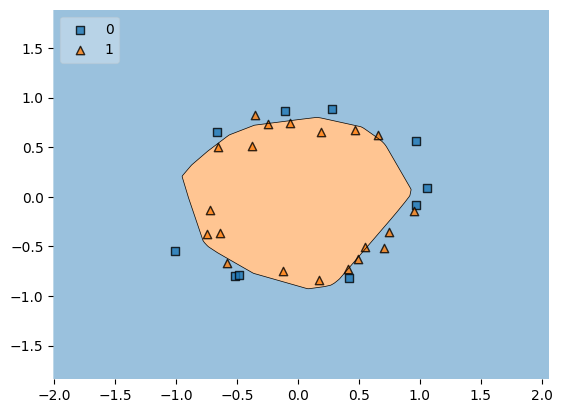

In [20]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_teat,y_test.ravel(),clf=model,legend=2)

In [21]:
# overtfiting 

# Early stoping

In [22]:
model1=Sequential()
model1.add(Dense(256,input_dim=2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
callback = EarlyStopping(
    monitor="val_loss", 
    min_delta=0.00001 , 
    patience=20, 
    verbose=1, 
    mode='auto' , 
    baseline=None , 
    restore_best_weights=False 
)

In [30]:
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5787 - loss: 0.6522 - val_accuracy: 0.3333 - val_loss: 0.7612
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6060 - loss: 0.6429 - val_accuracy: 0.3333 - val_loss: 0.7631
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5982 - loss: 0.6470 - val_accuracy: 0.3333 - val_loss: 0.7654
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5748 - loss: 0.6534 - val_accuracy: 0.3333 - val_loss: 0.7681
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5982 - loss: 0.6441 - val_accuracy: 0.3333 - val_loss: 0.7713
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5552 - loss: 0.6591 - val_accuracy: 0.3333 - val_loss: 0.7738
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5865 - loss: 0.6449 - val_accuracy: 0.3333 - val_loss: 0.7758
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5865 - loss: 0.6458 - val_accuracy: 0.3333 - v

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

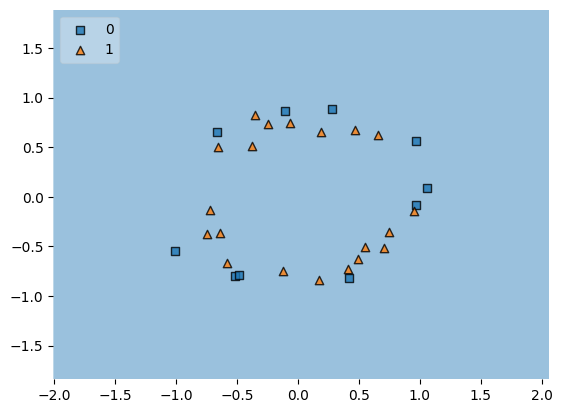

In [28]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_teat,y_test.ravel(),clf=model1,legend=2)